In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Loading the dataset

In [2]:
from sklearn.datasets import fetch_openml 
boston = fetch_openml(name='boston', version=1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = boston.data
Y = boston.target

In [4]:
X.shape

(506, 13)

In [5]:
df = pd.DataFrame(X)
df.columns = boston.feature_names

# adding age^2
#df['age_age'] = df.AGE ** 2

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [44]:
# X2 = df.values
# X2.shape

X2 = df.copy()
X2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [50]:
# Ensure all columns are of numeric type
df = df.apply(pd.to_numeric, errors='coerce')

# adding more features for making the equation of second-degree
for feature1 in df.columns:
    for feature2 in df.columns:
        feature_name = feature1 + "_" + feature2
        X2[feature_name]= df[feature1] * df[feature2]
X2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT_CHAS,LSTAT_NOX,LSTAT_RM,LSTAT_AGE,LSTAT_DIS,LSTAT_RAD,LSTAT_TAX,LSTAT_PTRATIO,LSTAT_B,LSTAT_LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,0.0,2.67924,32.74350,324.696,20.368200,4.98,1474.08,76.194,1976.5620,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,0.0,4.28666,58.68794,721.146,45.399294,18.28,2211.88,162.692,3627.6660,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,0.0,1.89007,28.95555,246.233,20.017413,8.06,975.26,71.734,1583.1049,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,0.0,1.34652,20.57412,134.652,17.822868,8.82,652.68,54.978,1160.2122,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,0.0,2.44114,38.09351,288.886,32.311526,15.99,1183.26,99.671,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,0.0,5.54091,63.75431,668.197,23.968062,9.67,2639.91,203.070,3790.5433,93.5089
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,0.0,5.20284,55.56960,696.436,20.770500,9.08,2478.84,190.680,3603.8520,82.4464
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,0.0,3.23172,39.34464,513.240,12.224700,5.64,1539.72,118.440,2238.5160,31.8096
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,0.0,3.71304,44.02512,578.664,15.480072,6.48,1769.04,136.080,2549.5560,41.9904


### Train-test split

In [45]:
from sklearn import model_selection

#random state attribute is used

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, random_state = 0)
X2_train, X2_test, Y2_train, Y2_test = model_selection.train_test_split(X2,Y, random_state = 0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

print(X2_train.shape, Y2_train.shape)
print(X2_test.shape, Y2_test.shape)

(379, 13) (379,)
(127, 13) (127,)
(379, 13) (379,)
(127, 13) (127,)


### Fitting data to Linear Regression Algorithm

In [46]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg2 = LinearRegression()

In [47]:
alg1.fit(X_train, Y_train)
alg2.fit(X2_train, Y2_train)

LinearRegression()

### Predicting labels for test data

In [48]:
Y_pred = alg1.predict(X_test)

score_train = alg1.score(X_train, Y_train)
score_test = alg1.score(X_test, Y_test)
print("Train1 score: ", score_train)
print("Test1 score: ", score_test)

TypeError: can't multiply sequence by non-int of type 'float'

### Comparing the predictions

NameError: name 'Y_pred' is not defined

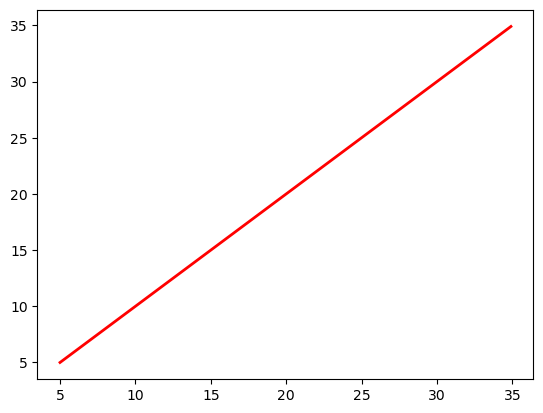

In [38]:
x = np.arange(5,35,0.1)
y=x
plt.plot(x, y, color="red", linewidth = 2)
plt.scatter(Y_test, Y_pred)

plt.xlabel("Y_true")
plt.ylabel("Y_pred")
plt.title("Y_true vs Y_pred")

plt.grid()
plt.axis([0,40,0,40])
plt.show()